### Bias and Variance: 

Two common problems with model. 

Over-fitting - the model fits the training data but fails to establish a relationship among the features and perfroms poorly on the test data. 

Underfitting - the model neither fits the training data nor the test data. 
    
<img src ="various_fits.png" width = 500, height = 400> 

Bias measures how far we are from the actual value on an average. 

Variance measures spread of the target values. 

<img src ="bias_variance.png" width = 500, height = 400> 

### Regularization 

Regularization is a technique to overcome both overfitting or underfitting of the data. For this example I am using 
mean squared error loss. 

$ \text{Loss} = \text{L} = \sum (\text{actual value} - \text{predicted value})^2 $

If $L$ represents the loss function then our goal is to 

minimize (L + regularization term) = $ minimize (\sum (y_j - \hat{y_j})^2 + \lambda ||w||)$

Note: $ L = \sum (y_j - \hat{y_j})^2 $ where 

$\hat{y} = w_0 + w_1 x_1 + w_2 x^2_2 + w_3 x^3_3.$

Below we have different regularization with the norms:

L1 norm: $ ||w||_1 =  \sum |w_i| $

L2 norm: $ ||w||_2^2  =  \sum w^2_i $

where $w$ is a matrix that contains coefficients for the different features and $\lambda$ is a regularization parameter. 

If $\lambda$ is large then the weights have to become zero to avoid overfitting. This might result in a simple model. 
$ \lambda$ can takes values between 0 and a large number. To find the best $\lambda$ we have to experiment with sub-samples.

### Different Linear regressions with Regularization

Least Absolute Shrinkage and Selection Operator (LASSO) regression  uses the L1 regularization. 
This is used when we have more number of features. If a feature is not improtant then 
Lasso regression can make that particular feature weight zero. 

Ridge regression uses L2 regularization. This is used to prevent multicollinearity. 

The value of $\alpha$ controls the penalty term. If $\alpha$ is very high, then the penalty is high and thus, 
the magnitude of the coefficients will be small.

#### Important Note: In sklearn for Lasso, Ridge and Elastic, alpha is same as $\lambda$ in the regularization equation. 

#### Hyperparamters are the parameters that the user has to provide manually. Here $\alpha$ is a hyperparameter. 

Elastic net regression is a combination of both L1 and L2 regularization. 

$min( L + \lambda_1 ||w||_1 + \lambda_2 ||w||_2^2) $

$\alpha = \lambda_1 + \lambda_2 $ and 

$l1\_ratio = \frac{\lambda_1}{\lambda_1 + \lambda_2} $

$l1\_ratio = 1$ can only happen when $\lambda_1 = 1$ and $\lambda_2 = 0,$ this will result in Lasso regression.

$l1\_ratio = 0$ can only happen when $\lambda_1 = 0$ and this will result in Ridge regression.

For $l1\_ratio$ between 0 and 1, we get Elastic net regression.

In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

## Preparing data

In [43]:
auto = pd.read_csv('auto_mpg.csv')

print(auto.columns)
print(auto.shape)
print(auto.info())

Index(['mpg', 'cylinder', 'displacement', 'horse power', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
(398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinder      398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horse power   398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [44]:
# Let's typecast horse power to float
#auto["horse power"] = auto["horse power"].astype(float)

In [45]:
print(auto["horse power"].unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [46]:
# we will consider all rows where horse power is not "?"

auto = auto[auto["horse power"] != "?"]
auto["horse power"] = auto["horse power"].astype(float)

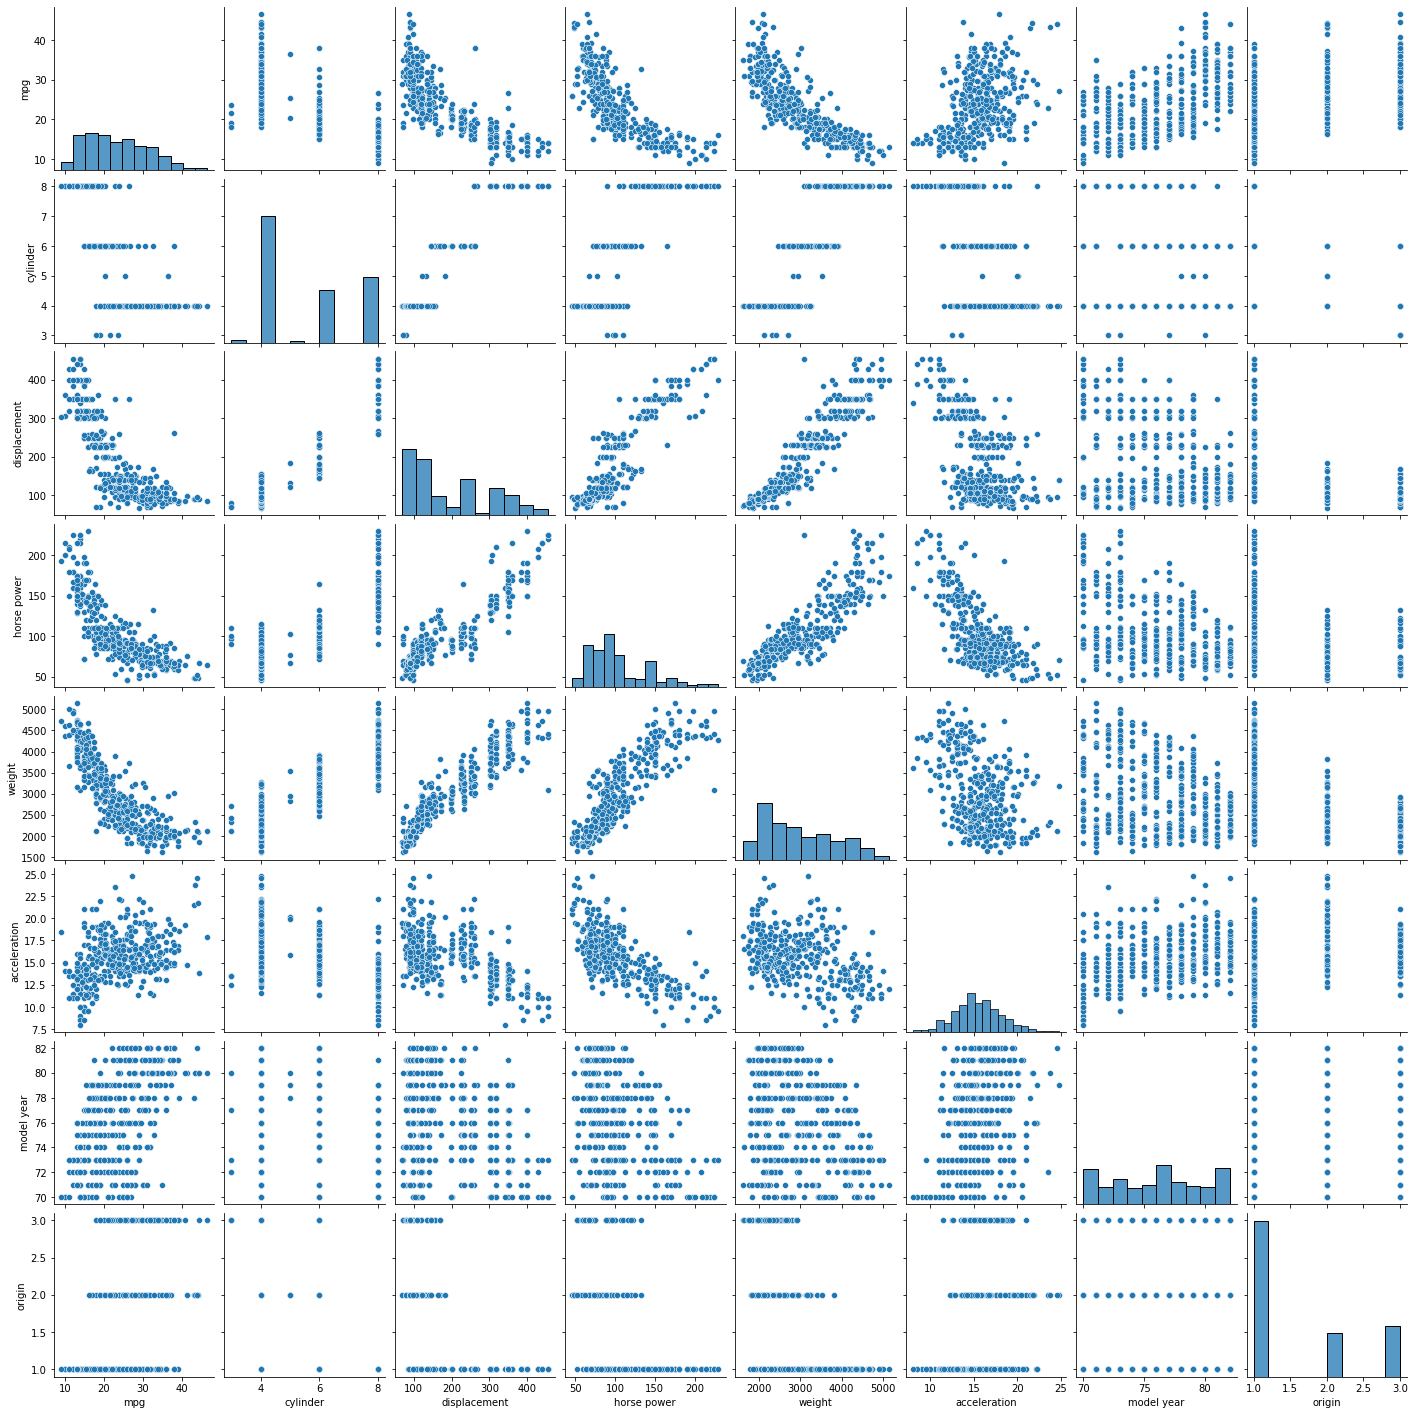

In [47]:
sns.pairplot(auto)
plt.show()

(8.5, -0.5)

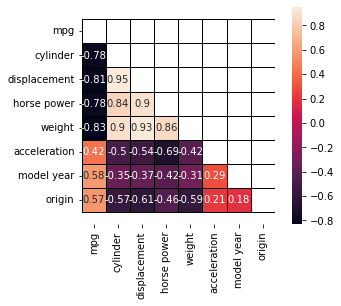

In [48]:
matrix = np.triu(auto.corr())

ax = sns.heatmap(auto.corr(), annot = True, square=True, \
            linewidths=1, linecolor='black', mask=matrix)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Features for our model

We want to consider displacement, horse power and weight.

In [49]:
autox = auto[["displacement", "horse power", "weight"]].copy(deep=True)
autoy = auto[["mpg"]].copy(deep=True)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(autox, \
                                                    autoy, \
                                                    test_size=0.2, \
                                                    random_state=4)
print(y_train.shape)
print(x_train[0:5])

(313, 1)
     displacement  horse power  weight
18           97.0         88.0    2130
155         250.0         72.0    3158
333         168.0        132.0    2910
194         232.0         90.0    3085
44          400.0        175.0    5140


## LASSO regression on original features

In [51]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=5, normalize=False)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)
print(pred.shape, y_test.shape)

# calculating mse

mse_test = mean_squared_error(y_test, pred)

mse_train = mean_squared_error(y_train, lassoReg.predict(x_train))

print("mse_train: ", mse_train)
print("mse_test: ", mse_test)

r2_lasso_train= lassoReg.score(x_train,y_train) # returns the r-squared value

r2_lasso_test= lassoReg.score(x_test,y_test) # returns the r-squared value

print("r2_lasso_train: ", r2_lasso_train)
print("r2_lasso_test: ", r2_lasso_test)

print(lassoReg.coef_, lassoReg.intercept_)

(79,) (79, 1)
mse_train:  17.948293870981075
mse_test:  18.64129829301567
r2_lasso_train:  0.6967257001567433
r2_lasso_test:  0.7143375168005808
[-0.00307397 -0.0177687  -0.00669142] [45.75356285]


C:\Users\nkanungo\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


## Scaling the features

In [52]:
autox = auto[["displacement", "horse power", "weight"]].copy(deep=True)
autoy = auto[["mpg"]].copy(deep=True)


autox["displacement"] = autox["displacement"].astype(float)
autox["horse power"] = autox["horse power"].astype(float)
autox["weight"] = autox["weight"].astype(float)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


x_train, x_test, y_train, y_test = train_test_split(autox, \
                                                    autoy, \
                                                    test_size=0.2, \
                                                    random_state=4)

scaler_fit = scaler.fit(x_train)

xtrain = scaler_fit.transform(x_train)
xtest = scaler_fit.transform(x_test)

print(xtest[0:5])
print(xtrain[0:5])

ytrain = y_train
ytest = y_test

[[-0.4761767  -0.40076887 -0.04782516]
 [ 1.58874789  1.55330452  1.84968846]
 [-0.05335881 -0.69930786  0.72765934]
 [-0.88916162 -0.61788813 -0.92751538]
 [-0.4761767  -0.29220924 -0.07811752]]
[[-0.89899459 -0.40076887 -0.96871299]
 [ 0.60545046 -0.8350074   0.27690897]
 [-0.20085342  0.79338709 -0.02359127]
 [ 0.42845693 -0.34648905  0.18845527]
 [ 2.0803966   1.96040315  2.67848752]]


In [53]:
"""
In-class activity - build a multi-linear regression with displacement, horse power and weight to the targer feature, mpg. 
In the previous cell, the 3 independent features are scaled. Use the scaled features and build a multi-linear regression. 
Compute the r-squared and MSE for train and test sets. 
"""





'\nIn-class activity - build a multi-linear regression with displacement, horse power and weight to the targer feature, mpg. \nIn the previous cell, the 3 independent features are scaled. Use the scaled features and build a multi-linear regression. \nCompute the r-squared and MSE for train and test sets. \n'

## LASSO on scaled features

In [54]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=5)

lassoReg.fit(xtrain,ytrain)

pred = lassoReg.predict(xtest)
print(pred.shape, ytest.shape)

# calculating mse

mse_test = mean_squared_error(ytest, pred)

mse_train = mean_squared_error(ytrain, lassoReg.predict(xtrain))

print("mse_train: ", mse_train)
print("mse_test: ", mse_test)

r2_lasso_train= lassoReg.score(xtrain,ytrain) # returns the r-squared value

r2_lasso_test= lassoReg.score(xtest,ytest) # returns the r-squared value

print("r2_lasso_train: ", r2_lasso_train)
print("r2_lasso_test: ", r2_lasso_test)

print(lassoReg.coef_, lassoReg.intercept_)

(79,) (79, 1)
mse_train:  43.28658474927909
mse_test:  48.129745038107544
r2_lasso_train:  0.2685818063371259
r2_lasso_test:  0.2624514522954654
[-0.         -0.         -1.39493022] [23.74600639]


## Linear Regression on the significant feature

In [55]:
weight_only = xtrain[:,2].reshape(-1,1)

linearReg = linear_model.LinearRegression()
linearReg.fit(weight_only, ytrain)

print(linearReg.coef_, linearReg.intercept_)

[[-6.39493022]] [23.74600639]


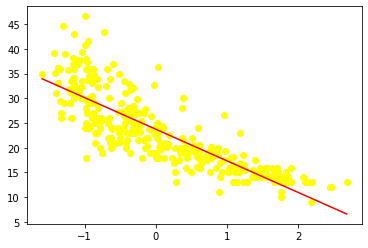

In [56]:
import matplotlib.pyplot as plt

plt.scatter(weight_only, ytrain, color='yellow')
x = np.linspace(np.min(weight_only), np.max(weight_only), 30)
y = linearReg.intercept_[0] + linearReg.coef_[0][0]*x
plt.plot(x, y, 'r')
plt.show()

## Ridge Regression on scaled features

In [57]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=5)

ridgeReg.fit(xtrain,ytrain)

pred = ridgeReg.predict(xtest)

mse_test = mean_squared_error(ytest, pred)

mse_train = mean_squared_error(ytrain, ridgeReg.predict(xtrain))

print("mse_train: ", mse_train)
print("mse_test: ", mse_test)

r2_ridge_train = ridgeReg.score(xtrain, ytrain)

r2_ridge_test = ridgeReg.score(xtest,ytest) # returns the r-squared value

print("r2_ridge_train: ", r2_ridge_train)
print("r2_ridge_test: ", r2_ridge_test)
print(ridgeReg.coef_, ridgeReg.intercept_)

mse_train:  17.90521379759905
mse_test:  17.511256642145607
r2_ridge_train:  0.6974536289050715
r2_ridge_test:  0.7316544707504706
[[-0.76559239 -1.2639765  -4.49844487]] [23.74600639]


## Elastic Net Regression on scaled features

In [58]:
# Elastic Net code
from sklearn.linear_model import ElasticNet

enReg = ElasticNet(alpha=1, l1_ratio=0.5)

enReg.fit(xtrain,ytrain)

pred_en = enReg.predict(xtest)
print(pred_en.shape)
print(ytest.shape)

# calculating mse

mse_test = mean_squared_error(ytest, pred)

mse_train = mean_squared_error(ytrain, enReg.predict(xtrain))

print("mse_train: ", mse_train)
print("mse_test: ", mse_test)

# calculating r-squared from Elastic Net

r2_en_train= enReg.score(xtrain,ytrain) # returns the r-squared value

r2_en_test= enReg.score(xtest,ytest) # returns the r-squared value

print("r2_en_train: ", r2_en_train)
print("r2_en_test: ", r2_en_test)

print(enReg.coef_, enReg.intercept_)

(79,)
(79, 1)
mse_train:  20.523402649876886
mse_test:  17.511256642145607
r2_en_train:  0.6532138032848896
r2_en_test:  0.7087388628619451
[-1.57413291 -1.44028432 -2.10577517] [23.74600639]


In [13]:
"""
In-class activity: For the auto_mpg data, can you pick alpha = 0.1, 
alpha = 0.15, alpha = 0.2 and run Lasso and Ridge regressions? 
Each regression, print the coefficient values for each alpha. 
"""




'\nIn-class activity: For the auto_mpg data, can you pick alpha = 0.1, \nalpha = 0.15, alpha = 0.2 and run Lasso and Ridge regressions? \nEach regression, print the coefficient values for each alpha. \n'